MAKE                2023          2024          2025          2026  \
MERCEDES    11658.769231  12810.516484  13962.263736  15114.010989   
VOLVO        6967.961538   7630.142857   8292.324176   8954.505495   
VOLKSWAGEN   6408.923077   6994.692308   7580.461538   8166.230769   
NISSAN       3038.576923   3215.560440   3392.543956   3569.527473   
KIA          5659.923077   6216.637363   6773.351648   7330.065934   
RENAULT      3157.615385   3382.032967   3606.450549   3830.868132   
AUDI         4718.615385   5171.120879   5623.626374   6076.131868   
PEUGEOT      5123.384615   5639.901099   6156.417582   6672.934066   
LAND ROVER   4776.961538   5247.208791   5717.456044   6187.703297   

MAKE                2027          2028          2029          2030       BRAND  
MERCEDES    16265.758242  17417.505495  18569.252747  19721.000000    MERCEDES  
VOLVO        9616.686813  10278.868132  10941.049451  11603.230769       VOLVO  
VOLKSWAGEN   8752.000000   9337.769231   9923.538462  10

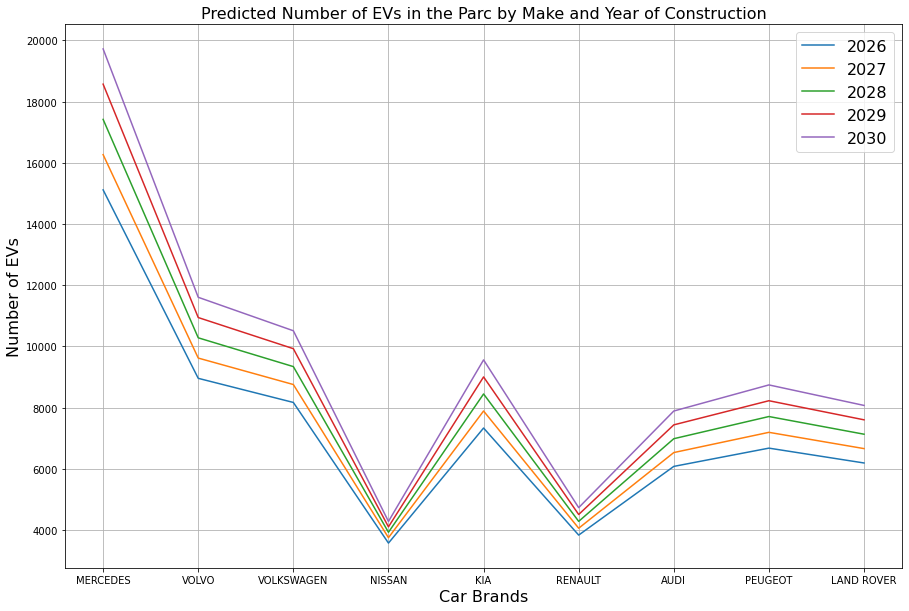

In [4]:
############## 1_1 Predicted Number of EV’s in the Parc by Make and Year of Construction ########

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Manually Replace 'url_to_your_csv_file' with the raw GitHub URL of your CSV file
# csv_url = r'C:\Users\varun\OneDrive - Maynooth University\0_BCP\New Files\VEH0171b_GenModels.csv'

csv_url = r'https://raw.githubusercontent.com/varunraaju/Battery_Cycle_Plots/main/1_1/VEH0171b_GenModels.csv?token=GHSAT0AAAAAACFKR6ADT226TYMLUAM2GJ52ZGI4CRA'

# Read the CSV file into a DataFrame, skipping the first 4 rows
df = pd.read_csv(csv_url, skiprows=4)

# Save the first four columns in a separate DataFrame with the renamed names
first_four_columns = df.iloc[:, :6].rename(columns={df.columns[2]: 'BODY TYPE', df.columns[3]: 'MAKE', df.columns[4]: 'MODEL', df.columns[5]: 'FUEL'})

# Drop the first two columns from the original DataFrame
df.drop(df.columns[:4], axis=1, inplace=True)

# Create a new DataFrame to store the sums
sum_df = pd.DataFrame(index=df.index)

# Iterate through columns and group by left 4 characters of the header
for col in df.columns:
    header_prefix = col[:4]
    if header_prefix not in sum_df.columns:
        selected_columns = df.loc[:, df.columns.str[:4] == header_prefix]
        sum_df[header_prefix] = pd.to_numeric(selected_columns.stack(), errors='coerce').groupby(level=0).sum()

# Print the first few rows of the new DataFrame with sums and the first four columns unchanged
result_df = pd.concat([first_four_columns, sum_df], axis=1)
new_df = result_df.drop(result_df.columns[[0, 1,6, 7]], axis=1)

# Calculate the sum of numbers from the 5th column till the last column and add a new "TOTAL" column
new_df['TOTAL'] = new_df[new_df.columns[2:]].sum(axis=1)

# Filter out rows where 'MODEL' column contains the string "MISSING"
clean_data = new_df[~new_df['MODEL'].str.contains("MISSING")]


##############################################################################

bar_data = clean_data.drop(clean_data.columns[[0, 2, 3]], axis=1)
bar_data = bar_data.groupby('MAKE', as_index=False).sum()
bar_data = bar_data.sort_values(by='TOTAL', ascending=False)
bar_data = bar_data.head(10)
bar_data = bar_data.drop('TOTAL', axis=1)

# Set 'MAKE' column as the index before transposing
bar_data.set_index('MAKE', inplace=True)
# Transpose the DataFrame
bar_data_transposed = bar_data.transpose()
# print(bar_data_transposed)

df=bar_data_transposed
# Create a DataFrame from the data
# df = pd.DataFrame(data)
# print(df)
# Create a new DataFrame to store the forecasted values
forecast_df = pd.DataFrame()

# Iterate through each brand and perform linear regression
for col in bar_data_transposed.columns[1:]:
    X = bar_data_transposed.index.values.reshape(-1, 1)
    y = bar_data_transposed[col].values

    model = LinearRegression()
    model.fit(X, y)

    # Generate forecasted values for 2023 to 2030
    forecast_years = np.arange(2023, 2031).reshape(-1, 1)
    forecast_values = model.predict(forecast_years)

    # Store the forecasted values in the new DataFrame
    forecast_df[col] = forecast_values

# Set the index of the forecast DataFrame to the years 2023 to 2030
forecast_df['MAKE'] = np.arange(2023, 2031)
forecast_df.set_index('MAKE', inplace=True)

# Print the DataFrame with the forecasted values
# print(forecast_df)

df2 = forecast_df.transpose()
df2['BRAND'] = df2.index
print(df2)

# Define a list of specific columns you want to plot
columns_to_plot = [2026, 2027, 2028, 2029, 2030]

# Plot each line for different years
plt.figure(figsize=(15, 10))
for col in columns_to_plot:
    plt.plot(df2['BRAND'], df2[col], label=str(col))

plt.xlabel("Car Brands", fontsize=16)  # Set x-axis label font size to 16
plt.ylabel("Number of EVs", fontsize=16)  # Set y-axis label font size to 16
plt.title("Predicted Number of EVs in the Parc by Make and Year of Construction", fontsize=16)  # Set title font size to 16
plt.legend(fontsize=16)
# plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels horizontally and align them to the right
plt.grid(True)
plt.show()
